# Support Vector Machine

Notes for https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

License: Standard Youtube License

## Video 20: Support Vector Machine Intro and Application

In [3]:
import numpy as np 
from sklearn import preprocessing, cross_validation, neighbors, svm
import pandas as pd

In [6]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace= True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

# clf = neighbors.KNeighborsClassifier()
clf = svm.SVC()  ##this is the only line that needs to change
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.942857142857


## Video 21: Understanding Vectors

vectors include direction and magnitude.

dot product of vectors: scalar value 

dot product: (X1* x2) + (y1* y2)

## Video 22: Support Vector Assertion


decision boundary: want the width between the positive and negative as large as possible


+class: x_i * w + b = 1


-class: x_i * w + b = -1


## Video 23: Support Vector Machine Fundamentals

Suppose we have a vector u_bar that we need to classify, then we have a support vector

w_bar that is perpendicular to the decision boundary, if we get the dot product of them,

we get the projection of u_bar on the perpendular line. 

All we need is to check whether w_bar * u_bar >= c (constant), if so, it is on the right side; or, the left.


Decision rule:


w_bar * u_bar + b >=0, then positive

https://www.youtube.com/watch?v=_PwhiWxHK8o

an mit lecutre on the math of SVM. Explained more coherently. 

it is an optimization problem. the soltuion is more than one answer. 

smallest w_bar is the goal. Also called global minimum. 

this algo is guaranteed to converge at global minimum.

svm is convex optimization problem



## Video 25: Creating an SVM from Scratch

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [4]:
class Support_Vector_Machine:
    def _init_(self, visualization = True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)
    
    # train
    def fit(self, data):
        pass
    
    def predict (self, features):
        # sign(x*w+b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        
        return classification

In [2]:
data_dict = {-1: np.array([[1, 7], [2, 8], [3, 8]]), 
             1 : np.array([[5, 1], [6, -1], [7, 3]])}

## Video 26, 27, 28: SVM Training

In [19]:
class Support_Vector_Machine:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)
    
    # train
    def fit(self, data):
        self.data = data
        # {||W||: [w, b]}
        opt_dict = { }
        
        transforms = [ [1, 1],
                      [-1, 1],
                      [-1, -1],
                      [1, -1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # constraint yi(xi*w+b) =1
        step_sizes = [self.max_feature_value  * 0.1, 
                     self.max_feature_value  * 0.01,
                      # as the number decreases, it gets more expensive
                     self.max_feature_value  * 0.001]
        
        #extremely expensive. B does not need to take as small steps as w.
        b_range_multiple = 2 
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum,  latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1 * (self.max_feature_value * b_range_multiple),
                                  self.max_feature_value * b_range_multiple,
                                  step*b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi (xi * w + b) >=1
                        # add a break later...
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot (w_t, xi) + b) >=1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0]<0:
                    optimized = True
                    print("optimized a step")
                else:
                    # w= [5, 5]
                    # step = 1
                    # w - step = [4, 4]
                    w = w - step
                    
            norms = sorted([n for n in opt_dict])
            
            #||w||: [w, b]
            opt_choice = opt_dict[norms[0]]  #smallest norms
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step *2 
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))             
                         
    
    def predict (self, features):
        # sign(x*w+b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        
        if classification != 0 and self.visualization: 
            self.ax.scatter(features[0], features[1], s =200,
                            marker = '*', c = self.colors[classification])
        
        return classification
    
    def visualize (self):
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i])
        for x in data_dict[i]] 
         for i in data_dict]
        
        # hyperplane v = x*w +b
        # psv = 1, nsv = -1
        # dec = 0
        def hyperplane (x, w, b, v):
            return (-w[0]*x -b +v)/w[1]
        
        datarange = (self.min_feature_value * 0.9, self.max_feature_value *1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #(w.x+b)=1
        psv1 = hyperplane (hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane (hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
          #(w.x+b)=-1
        nsv1 = hyperplane (hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane (hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
          #(w.x+b)=0
        db1 = hyperplane (hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane (hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show() 
        

In [5]:
#vectors

data_dict = {-1: np.array([[1, 7], [2, 8], [3, 8]]), 
             1 : np.array([[5, 1], [6, -1], [7, 3]])}

optimized a step
optimized a step
optimized a step
[1 7] : 1.272
[2 8] : 1.272
[3 8] : 1.04
[5 1] : 1.048
[ 6 -1] : 1.744
[7 3] : 1.048


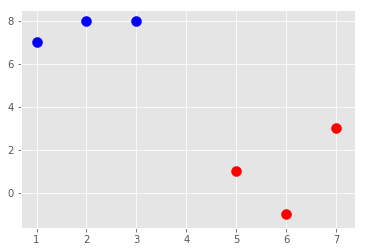

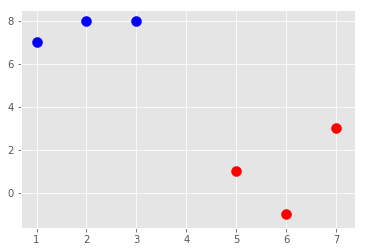

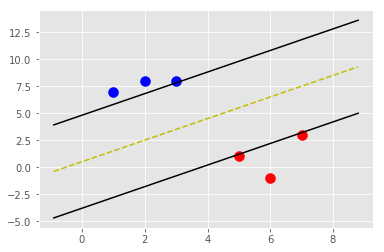

In [20]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
svm.visualize()

In [14]:
-